# **BMW Price Prediction**

The aim of this notebook is to develop a model able to predict the price of a BMW given some features. To do so, we have a dataset with 4843 entries composed by features like: power, milleage, colour, fuel type, does it have gps, bluetooth... 

Several models (Linear Regression, Decision Tree, Random Forest) will be built and we will pick the best one that provides us the best approximation. As the problem is a regression the most common metric to compare different models is the root-mean-square error (RMSE). The cost function of most of the models have a similar metric which is the Mean Square Error (MSE) without the root. 

## **Data Understanding**

In this section, univariate and multivariate analysis will be performed in order to see how the data is distributed, detect outliers, work with data types: numeric, boolean, categorical or object; as well as detect nulls and see correlations.

First of all we import the necessary packages and the dataset


In [299]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

In [300]:
path = '/Users/carlosperezricardo/Documents/NuclioDS/bmw_data/'
df = pd.read_csv(path+'bmw_pricing_v2.csv')

df.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,BMW,118,140411.0,100.0,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400.0,2018-04-01


We have 17 columns, the column 'precio' is the target we would like to predict. Moreover, we have the column 'fecha_venta' which determines when the vehicle was sold. 

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        4841 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               4842 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4831 non-null   object 
 7   tipo_coche                   4834 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4841 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  4839 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

### **Univariate Analysis**

In this section a univariate analysis will be discussed. First of all let's begin with the numeric variables.

As we can see the target variable 'precio' is skewed to the right. And most of the values are comprised between 0 and 50.000 euros (in the dataset there are no monetary units established, but from now on let's work in euros).

In [302]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
km,4841.0,140959.347862,60208.534313,-64.0,102884.0,141080.0,175217.0,1000376.0
potencia,4842.0,128.981826,38.994839,0.0,100.0,120.0,135.0,423.0
precio,4837.0,15831.920612,9222.630708,100.0,10800.0,14200.0,18600.0,178500.0


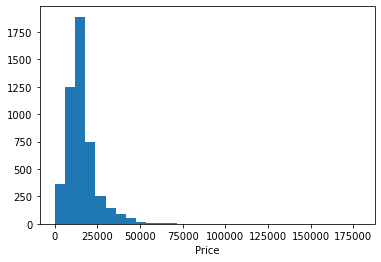

In [303]:
plt.hist(df['precio'], bins=30)
plt.xlabel('Price')
plt.show()

In [304]:
df.sort_values('precio',ascending=False).head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
4753,BMW,X3,72515.0,135.0,2013-03-01,diesel,blue,suv,False,False,True,False,False,False,False,True,178500.0,2018-08-01
4684,BMW,X4,103222.0,140.0,2014-08-01,diesel,grey,suv,True,True,False,False,True,False,True,True,142800.0,2018-08-01
90,BMW,i8,12402.0,170.0,2016-01-01,hybrid_petrol,grey,coupe,True,True,False,False,False,False,False,True,95200.0,2018-04-01
4146,BMW,X6 M,2970.0,423.0,2016-04-01,petrol,red,suv,True,True,True,False,False,False,True,True,82400.0,2018-04-01
2938,BMW,640 Gran Coupé,-64.0,230.0,2017-03-01,diesel,black,sedan,True,True,False,True,False,False,True,True,75000.0,2018-04-01


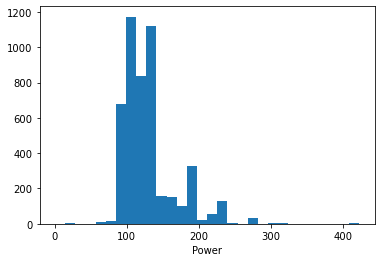

In [305]:
plt.hist(df['potencia'], bins=30)
plt.xlabel('Power')
plt.show()

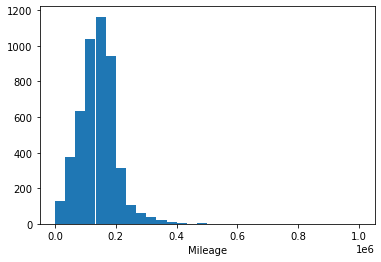

In [306]:
plt.hist(df['km'], bins=30)
plt.xlabel('Mileage')
plt.show()

Combining both numerical entries, one would expect that cars with more power, are usually more expensive. Let's find out if this statement is true.

In the following plot, we can see that there is kind of a linear relation but there are 3 outliers. The 3 most expensive cars are cars that are not in the first quartile of cars with the highest power (which is a little surprising).

There is a correlation of 0.639 between the variables (price and power).

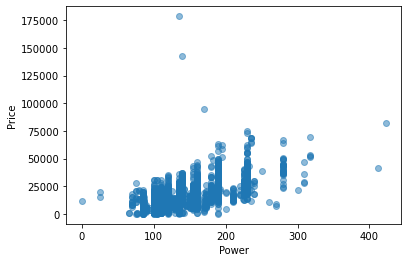

In [307]:
plt.scatter( df['potencia'], df['precio'], alpha=0.5)
plt.ylabel('Price')
plt.xlabel('Power')
plt.show()

In [308]:
df[['potencia', 'km', 'precio']].corr()

,potencia,km,precio
potencia,1.000000,-0.050141,0.639254
km,-0.050141,1.000000,-0.410189
precio,0.639254,-0.410189,1.000000


The same plot but in this case with the mileage on the x-axis. Cars with more mileage normally are sold in a smaller price. However, the data does not look linear, even though the cars with more km on it, are cheaper. This negative relation is observed in the negative of the correlation with -0.41 (not so strong linear correlation).

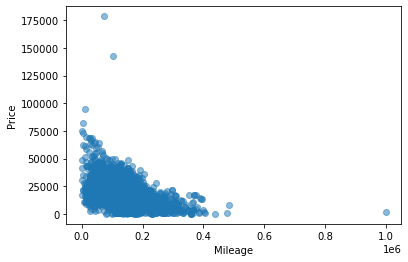

In [309]:
plt.scatter( df['km'], df['precio'], alpha=0.5)
plt.ylabel('Price')
plt.xlabel('Mileage')
plt.show()

Next step is to analyse the categorical or not numerical beforehand variables. As we can see there are categorical variables such as 'modelo', 'color', 'tipo_coche' or 'tipo_gasolina', boolean types such as 'gps' which indicates if the car has gps installed or not and date variables.

In [310]:
df.describe(exclude = 'number').T

,count,unique,top,freq
marca,4841,1,BMW,4841
modelo,4840,76,320,752
fecha_registro,4842,199,2013-07-01,173
tipo_gasolina,4838,5,diesel,4631
color,4831,10,black,1632
tipo_coche,4834,8,estate,1604
volante_regulable,4839,2,True,2662
aire_acondicionado,4841,2,True,3837
camara_trasera,4841,2,False,3864
asientos_traseros_plegables,4839,2,False,3877


#### **Categorical variables**

In this part, a study of the categorical variables will be carried. First of all, we will start with the variable 'modelo'. The most sold BMW car is 320 (the iconic car who almost anyone had seen in the street once in its life).

Has every 320 been sold at the same price? In this case the data looks more normal distributed, even though it is skewed to the left. 

Moreover, the model 320 has different engines mounted and each engine has different power, as we can see the plot.

In [311]:
df['modelo'].value_counts().sort_values(ascending=False)

320                  752
520                  633
318                  568
X3                   438
116                  358
                    ... 
635                    1
216                    1
735                    1
225 Active Tourer      1
ActiveHybrid 5         1
Name: modelo, Length: 76, dtype: int64

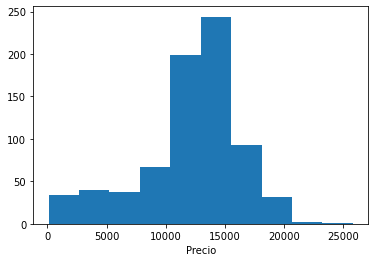

In [312]:
bmw_320 = df[df['modelo'] == '320']

plt.hist(bmw_320['precio'])
plt.xlabel('Precio')
plt.show()

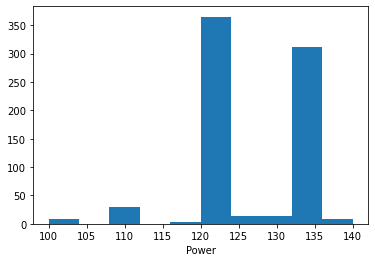

In [313]:
bmw_320 = df[df['modelo'] == '320']

plt.hist(bmw_320['potencia'])
plt.xlabel('Power')
plt.show()

Next question that come up is that: Which type of car is normally more expensive diesel or gasoline? 

In this case, we have up to 4 different types of fuel: diesel, petrol, hybrid and electro. 
Outliers are in the diesel cars, and hybrid cars are normally more expensive that totally fuel cars.

In [314]:
df['tipo_gasolina'].value_counts()

diesel           4631
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
Name: tipo_gasolina, dtype: int64

In [315]:
df['tipo_gasolina'] = np.where( df['tipo_gasolina'] == 'Diesel', 'diesel', df['tipo_gasolina'] )

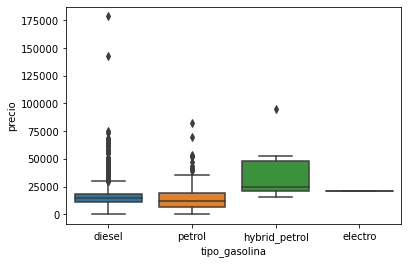

In [316]:
sns.boxplot( data=df, x='tipo_gasolina', y='precio')
plt.show()

Does color affect on the price? What are the most sold colors? 

There does not seem to be so much difference on the color. One could say the orange are usueally more expensive than other colors (by observing the median) but that's probably because there are fewer orange cars in the dataset.

Most of the cars are black, grey and white. 

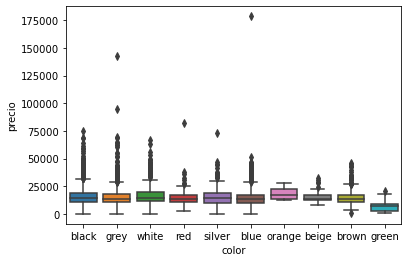

In [317]:
sns.boxplot( data=df, x='color', y='precio')
plt.show()

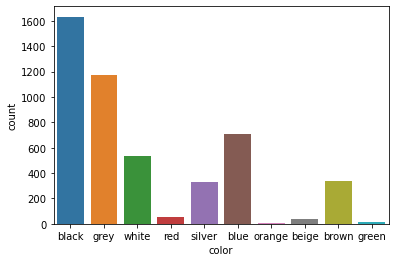

In [318]:
sns.countplot( data=df, x='color')
plt.show()

Finally, each car is classified by its type (tipo_coche) into coupe, sedan, hatchback, suv or van. As we can see in the plot, the most expensive cars are SUVs however by observing the medians (so in average) coupes are normally more expensive. 

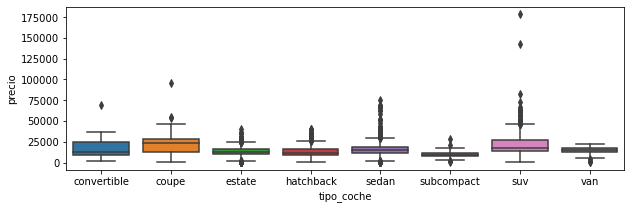

In [319]:
fig, ax = plt.subplots(figsize=(10,3))
sns.boxplot( data=df, x='tipo_coche', y='precio')
plt.show()

#### **Time variables**

There are two datetime variables: 'fecha_registro' and 'fecha_venta'. The first one is the date when the car was probably bought by the first owner and the last one when it was sold.

What's surprising is that there are actually some cars that were sold even before their were registered. 

In [320]:
df['fecha_registro'] = pd.to_datetime(df['fecha_registro'])
df['fecha_venta'] = pd.to_datetime(df['fecha_venta'])

df['antiquity'] = (df['fecha_venta'] - df['fecha_registro'])/np.timedelta64(1, 'Y')

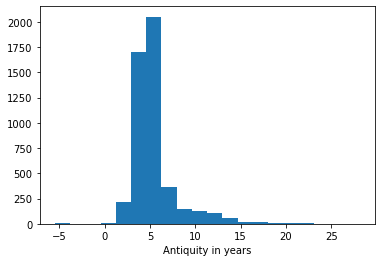

In [321]:
plt.hist(df['antiquity'], bins=20)
plt.xlabel('Antiquity in years')
plt.show()

Let's plot now the time series of the number of cars sold each day and each month. It seems there is a gap between 2011 and 2017, and there is no data between.

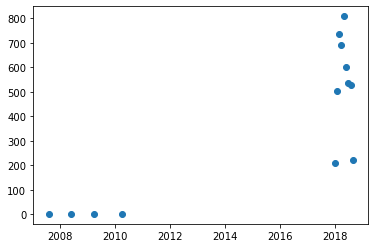

In [322]:
same_date = df.groupby('fecha_venta')['marca'].count()

plt.scatter(same_date.index, same_date)
plt.show()

As we can see in the following plot, the mean of 'younger' cars are more expensive. The plot has an exponential shape and it won't be fitted by a linear model. 

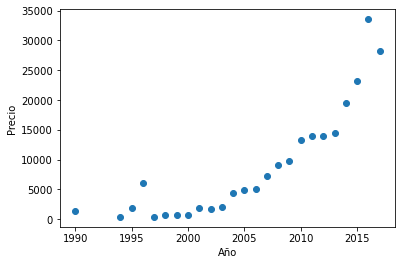

In [323]:
df['year'] = df['fecha_registro'].dt.year

same_date_registro = df.groupby('year')['precio'].mean()

plt.scatter(same_date_registro.index, same_date_registro)
plt.xlabel('Año')
plt.ylabel('Precio')
plt.show()

In [324]:
print(df['fecha_venta'].min())
print(df['fecha_venta'].max())

2007-08-01 00:00:00
2018-09-01 00:00:00


It is important to mention that these 2 variables won't be used to predict the price of a car. As the 'fecha_registro' is the date when the car is listed (which could be today) and the 'fecha_venta' is totally unknown. So no futher analysis will be carried with these variables. However the antiquity will be used to built the model.

#### **Boolean variables**

In this case, we will work with variables such as 'gps', 'bluetooth', 'aire_acondicionado'... Someone would expect that if the value of one of those is True, normally the price would tend to go up; as the car has more extras.

However as seen with the violin plots, this not true for most of the cars. And it is quite strange that the most expensive cars do not normally have these extras. At least the most expensive car which has a price of 178500.0 does not have gps, volante_regulable, bluetooth... So the analysis carried out does not support the hyphotesis (a statistical test could be performed).

In [325]:
boolean_cols = ['volante_regulable', 'aire_acondicionado', 'camara_trasera', 'asientos_traseros_plegables', 'elevalunas_electrico',
       'bluetooth', 'gps', 'alerta_lim_velocidad']

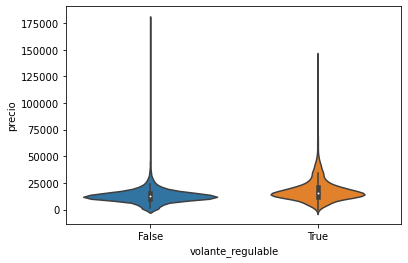

In [326]:
def plot_boolean(df, x):
    fig, ax = plt.subplots()
    sns.violinplot(x=x, y='precio', data=df) 

ax = plot_boolean(df, 'volante_regulable')
plt.show()

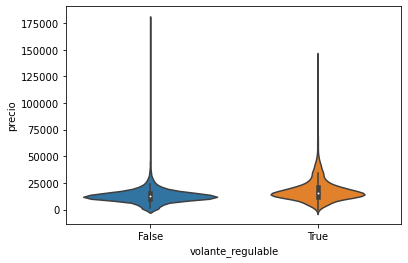

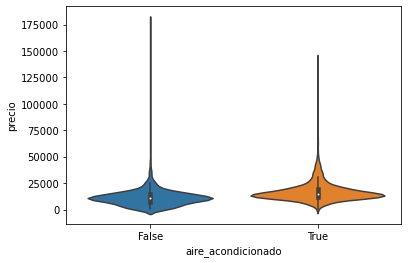

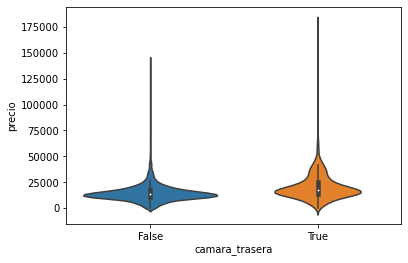

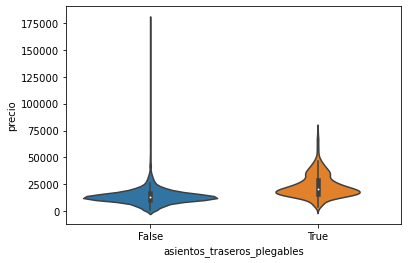

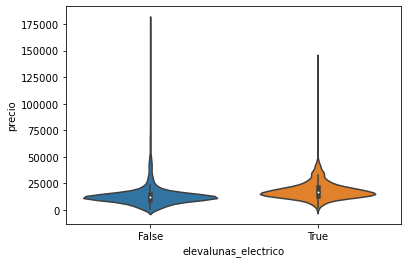

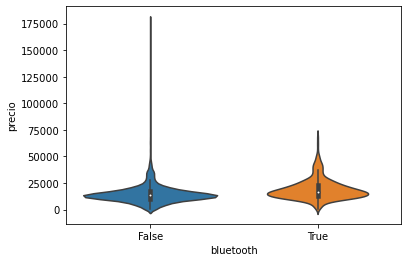

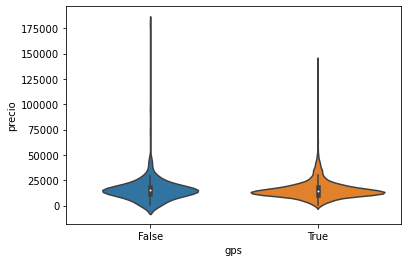

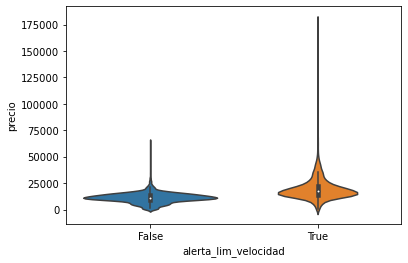

In [327]:
for col, i in zip(boolean_cols, range(len(boolean_cols))):
    ax_ = plot_boolean(df, col)

plt.show()

## **Construction of the model**

After the EDA, the model will be built. In this section several models will be tested. But first of all, values must be clean, so no outliers, nulls or wrong data will be worked.

After the pre-processing of the data, we will divide the dataset into 3 parts: training, test and validation.

### **Cleaning data**

In this part we will clean data from outliers and nulls in this dataset fortunately we do not have many nulls, unfortunately we have at least one in all columns. So let's dig on it:

In [328]:
df.isnull().sum()

marca                           2
modelo                          3
km                              2
potencia                        1
fecha_registro                  1
tipo_gasolina                   5
color                          12
tipo_coche                      9
volante_regulable               4
aire_acondicionado              2
camara_trasera                  2
asientos_traseros_plegables     4
elevalunas_electrico            2
bluetooth                       4
gps                             0
alerta_lim_velocidad            2
precio                          6
fecha_venta                     1
antiquity                       2
year                            1
dtype: int64

For example, for 'marca' we can impute that it is 'BMW', as there is only one type of manufacturer. However this variable won't be used in the model as it does not offer any value to the prediction.

Let's see if there are rows that held most the nulls so dropping these entries won't affect so much the size of the data. We only sacrifice 60 entries from 4843, so it does not sound like bad idea.

In [329]:
df.drop(columns='marca', axis=1, inplace=True)

In [330]:
print('With nulls: ',df.shape[0])
print('Without nulls: ',df.dropna(how='any').shape[0])

With nulls:  4843
Without nulls:  4783


Let's say we would like to keep all columns: 
- For the 'modelo', we cannot guess the name, so we can input a default model, like 'No Model'. 
- For the 'km', we can impute the median. And as there are fewer values this won't affect so much, and won't add noise to the predictor.
- For the 'potencia', we could check if there are more models like the register and impute the mode or median.
- For the 'tipo_gasolina', we should introduce 'Not Known'
- For the 'color', we should introduce 'Not Known'
- For the 'tipo_coche', we should introduce 'Not Known'
- For the boolean variables, I would suggest to introduce a False. For example if a car has gps, normally it is noted.
- For the price, I will drop these entries as they are the target variable.

In [331]:
df_clean = df.dropna(how='any')

df_clean.isnull().sum()

modelo                         0
km                             0
potencia                       0
fecha_registro                 0
tipo_gasolina                  0
color                          0
tipo_coche                     0
volante_regulable              0
aire_acondicionado             0
camara_trasera                 0
asientos_traseros_plegables    0
elevalunas_electrico           0
bluetooth                      0
gps                            0
alerta_lim_velocidad           0
precio                         0
fecha_venta                    0
antiquity                      0
year                           0
dtype: int64

#### **Detecting outliers**

There are some outliers, especially in the target variable, that should be discussed.

For example, a new BMW X3 M Competition is worth 115.000 euros today. It probably costed much more when it was firstly released in 2013, but the price that appears (178.500 euros) is an outlier. A car from 2013 with 72.515 km and sold for 178.500 in 2018, seems really strange.

In [332]:
df_clean.sort_values('precio',ascending=False).head(10)

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,antiquity,year
4753,X3,72515.0,135.0,2013-03-01,diesel,blue,suv,False,False,True,False,False,False,False,True,178500.0,2018-08-01,5.418318,2013.0
4684,X4,103222.0,140.0,2014-08-01,diesel,grey,suv,True,True,False,False,True,False,True,True,142800.0,2018-08-01,4.000082,2014.0
90,i8,12402.0,170.0,2016-01-01,hybrid_petrol,grey,coupe,True,True,False,False,False,False,False,True,95200.0,2018-04-01,2.247822,2016.0
4146,X6 M,2970.0,423.0,2016-04-01,petrol,red,suv,True,True,True,False,False,False,True,True,82400.0,2018-04-01,1.998672,2016.0
2938,640 Gran Coupé,-64.0,230.0,2017-03-01,diesel,black,sedan,True,True,False,True,False,False,True,True,75000.0,2018-04-01,1.084211,2017.0
4731,X5 M,4530.0,230.0,2016-07-01,diesel,silver,suv,True,True,False,True,False,False,False,True,73100.0,2018-08-01,2.083547,2016.0
1,M4,13929.0,317.0,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,2018-02-01,1.837136,2016.0
3595,740,34624.0,235.0,2016-06-01,diesel,grey,sedan,True,True,True,True,False,True,True,True,68700.0,2018-09-01,2.250560,2016.0
3320,740,25858.0,235.0,2016-06-01,diesel,black,sedan,True,True,False,True,False,False,True,True,68300.0,2018-06-01,1.998672,2016.0
3345,740,25571.0,235.0,2016-06-01,diesel,black,sedan,True,True,False,True,False,False,True,True,68300.0,2018-06-01,1.998672,2016.0


In [333]:
df_clean.sort_values('fecha_registro').head(10)

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,antiquity,year
2771,316,146951.0,66.0,1990-03-01,petrol,white,sedan,False,False,False,False,False,False,False,False,1300.0,2018-04-01,28.085450,1990.0
3062,318,98097.0,85.0,1994-01-01,petrol,blue,sedan,True,False,False,False,False,False,True,True,400.0,2018-04-01,24.246904,1994.0
25,318,196092.0,85.0,1995-10-01,petrol,blue,convertible,True,False,False,False,False,False,False,False,1800.0,2018-05-01,22.582257,1995.0
41,M3,270907.0,236.0,1996-08-01,petrol,black,convertible,True,False,False,False,False,True,True,False,12100.0,2018-08-01,21.999083,1996.0
2829,525,439060.0,105.0,1996-10-01,diesel,silver,sedan,False,False,True,False,False,False,True,False,100.0,2018-03-01,21.413171,1996.0
3380,525,245302.0,105.0,1997-01-01,diesel,green,sedan,False,True,False,False,False,False,True,True,900.0,2018-06-01,21.413171,1997.0
2473,525,230578.0,85.0,1997-07-01,diesel,black,sedan,False,False,False,False,False,False,True,False,200.0,2018-08-01,21.084622,1997.0
2611,525,230264.0,85.0,1997-07-01,diesel,black,sedan,False,False,False,False,False,False,True,False,200.0,2018-08-01,21.084622,1997.0
2574,525,229880.0,85.0,1997-07-01,diesel,black,sedan,False,False,False,False,False,False,True,False,200.0,2018-08-01,21.084622,1997.0
3575,316,359661.0,75.0,1997-09-01,petrol,grey,sedan,False,False,False,False,False,False,True,False,400.0,2018-08-01,20.914872,1997.0


In [334]:
x = df_clean.sort_values('precio',ascending=False).head(5)
print(x.iloc[3])

new_max_price = x.iloc[3]['precio']

modelo                                        X6 M
km                                            2970
potencia                                       423
fecha_registro                 2016-04-01 00:00:00
tipo_gasolina                               petrol
color                                          red
tipo_coche                                     suv
volante_regulable                             True
aire_acondicionado                            True
camara_trasera                                True
asientos_traseros_plegables                  False
elevalunas_electrico                         False
bluetooth                                    False
gps                                           True
alerta_lim_velocidad                          True
precio                                       82400
fecha_venta                    2018-04-01 00:00:00
antiquity                                  1.99867
year                                          2016
Name: 4146, dtype: object


In [335]:
df_clean['precio'] = np.where( df_clean['precio'] > new_max_price*1.1, new_max_price, df_clean['precio'] )

There are entries with negative mileage so we impose 0 in these cases. There are cars with a power of 0, which is not realistic.

And cars sold at 100 euros, which could be possible, but very uncommon.

In [336]:
df_clean['km'] = np.where( df_clean['km'] < 0, 0, df_clean['km'] )

Next step is to convert the categorical columns into numerical columns, by changing them to ordinal, grouping by or using a One Hot Encoder.

These variables are the ones like: 'tipo_gasolina', 'color', 'tipo_coche' and 'modelo'.

In [337]:
categorical_cols = ['tipo_gasolina', 'color', 'tipo_coche', 'modelo']

for col in categorical_cols:
    print(col)
    col_vc = df_clean[col].value_counts()
    print(len(col_vc))

tipo_gasolina
4
color
10
tipo_coche
8
modelo
76


In [338]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder

model_df = df_clean.copy(deep=True)

for col in categorical_cols:
    enc = OneHotEncoder(handle_unknown='ignore')
    enc.fit(np.array(model_df[col]).reshape(-1, 1))
    categories = enc.categories_
    matrix = enc.transform( np.array(model_df[col]).reshape(-1, 1) ).toarray()
    for x, i in zip(categories, range(len(categories))):
        model_df[col+'_'+x] = matrix[i,:]

In [339]:
for col in categorical_cols:
    model_df.drop(columns=col, axis=1, inplace=True)

In [340]:
model_df.shape

(4783, 113)

In [341]:
list(model_df.columns)

['km',
 'potencia',
 'fecha_registro',
 'volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'asientos_traseros_plegables',
 'elevalunas_electrico',
 'bluetooth',
 'gps',
 'alerta_lim_velocidad',
 'precio',
 'fecha_venta',
 'antiquity',
 'year',
 'tipo_gasolina_diesel',
 'tipo_gasolina_electro',
 'tipo_gasolina_hybrid_petrol',
 'tipo_gasolina_petrol',
 'color_beige',
 'color_black',
 'color_blue',
 'color_brown',
 'color_green',
 'color_grey',
 'color_orange',
 'color_red',
 'color_silver',
 'color_white',
 'tipo_coche_convertible',
 'tipo_coche_coupe',
 'tipo_coche_estate',
 'tipo_coche_hatchback',
 'tipo_coche_sedan',
 'tipo_coche_subcompact',
 'tipo_coche_suv',
 'tipo_coche_van',
 'modelo_ Active Tourer',
 'modelo_114',
 'modelo_116',
 'modelo_118',
 'modelo_120',
 'modelo_123',
 'modelo_125',
 'modelo_135',
 'modelo_214 Gran Tourer',
 'modelo_216',
 'modelo_216 Active Tourer',
 'modelo_216 Gran Tourer',
 'modelo_218',
 'modelo_218 Active Tourer',
 'modelo_218 Gran Tourer

After cleaning the data, we normalize the features so all features are within the same range so the model sees them as 'equally'. The only columns that we have to scale are the numerical ones: price, power and milleage.

For the case of the price as it is the target variable we will use both the scaled (with StandardScaler) and the not scaled version, where as for the 'km' and 'potencia' we will use a StandardScaler and the MixManScaler.

In [342]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

price_scaler = StandardScaler()
price_scaler.fit( np.array(model_df['precio']).reshape(-1, 1) )
model_df['scaled_price'] = price_scaler.transform( np.array(model_df['precio']).reshape(-1, 1) )

power_scaler = MinMaxScaler()
power_scaler.fit( np.array(model_df['potencia']).reshape(-1, 1) )
model_df['scaled_power'] = power_scaler.transform( np.array(model_df['potencia']).reshape(-1, 1) )

km_scaler = StandardScaler()
km_scaler.fit( np.array(model_df['km']).reshape(-1, 1) )
model_df['scaled_km'] = km_scaler.transform( np.array(model_df['km']).reshape(-1, 1) )

delete_cols = ['precio','potencia','km']

In [343]:
#for col in delete_cols:
#    df_clean.drop(columns=col, axis=1, inplace=True)

There features that we have to avoid because they include the target and datetime variables. So, we can extract the X matrix and the target vector y. 

In [344]:
avoid = ['precio','scaled_price','fecha_registro','fecha_venta']
avoid.append('potencia'); avoid.append('km')
#avoid.append('scaled_power'); #avoid.append('scaled_km')
#avoid.append('antiquity')

variables = list(set(model_df.columns).difference(set(avoid)))
len(variables)

110

In [345]:
variables

['modelo_520',
 'color_black',
 'modelo_635',
 'tipo_coche_van',
 'modelo_120',
 'color_grey',
 'modelo_i8',
 'tipo_coche_sedan',
 'modelo_118',
 'gps',
 'modelo_X3',
 'modelo_123',
 'modelo_328',
 'color_orange',
 'modelo_318 Gran Turismo',
 'bluetooth',
 'modelo_M4',
 'modelo_318',
 'modelo_X4',
 'modelo_M3',
 'modelo_520 Gran Turismo',
 'camara_trasera',
 'modelo_425',
 'modelo_216 Gran Tourer',
 'asientos_traseros_plegables',
 'modelo_316',
 'color_silver',
 'tipo_coche_convertible',
 'alerta_lim_velocidad',
 'modelo_X6',
 'tipo_coche_hatchback',
 'modelo_435',
 'modelo_M550',
 'modelo_435 Gran Coupé',
 'modelo_640 Gran Coupé',
 'modelo_523',
 'modelo_650',
 'modelo_135',
 'modelo_325',
 'modelo_640',
 'tipo_gasolina_hybrid_petrol',
 'modelo_M135',
 'modelo_220 Active Tourer',
 'year',
 'antiquity',
 'modelo_ActiveHybrid 5',
 'modelo_335 Gran Turismo',
 'modelo_525',
 'modelo_X5',
 'modelo_430 Gran Coupé',
 'volante_regulable',
 'tipo_gasolina_diesel',
 'modelo_320 Gran Turismo',
 

In [346]:
#y = np.array(df_clean['scaled_price'])
y = np.array(model_df['precio'])

X = np.array(model_df[variables])

### **Training and Test Datasets**

Before continuing, we divide the data into: train, test and validation.

In [347]:
from sklearn.model_selection import train_test_split 

X_train_test, X_validation, y_train_test, y_validation = train_test_split(X, y, test_size = 0.20, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X_train_test, y_train_test, test_size = 0.30, random_state = 42)

#### **Linear Regression**

This is the simplest model, it tries to fit the data with a linear model with the following expression:

$$y = a_0 + b_0 \cdot x_0 + b_1 \cdot x_1 + \; ... \;+ b_n \cdot x_n$$

The cost function is directly connected to the MSE and it tries to fine a model with the lowest MSE value.

In [348]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

In [349]:
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

y_pred_train = lin_reg.predict(X_train)

print('MSE train:')
print(MSE(y_train, y_pred_train))

print('MSE test:')
print(MSE(y_test, y_pred))

MSE train:
22336798.21321882
MSE test:
21540014.93989547


In [350]:
print('R2 score:')
print(r2_score(y_test, y_pred))
print('MSE:')
print(MSE(y_test, y_pred))

R2 score:
0.722186320583742
MSE:
21540014.93989547


As we can see both the MSE in the train and the test set are of similar magnitud and the $R^2$ score is 0.722 which ensures that a Linear Regression for this problem it is not a bad solution. In the following piece of code we can observed the actual value and the predicted value of an entry.

In [351]:
results_df = pd.DataFrame( y_test , columns=['actual'])
results_df['predicted'] = y_pred
results_df

,actual,predicted
0,18200.0,18293.0
1,47300.0,33590.0
2,3800.0,2294.0
3,15700.0,13867.0
4,12700.0,15215.0
...,...,...
1143,42700.0,24433.0
1144,14300.0,21870.0
1145,17800.0,22785.0
1146,7300.0,12651.0


#### **Decision Tree** 

In this part, we will try a DecisionTreeRegressor, we establish the criterion to reduce the MSE, and we tune a little bit the hyperparameters max_depth ad min_samples_leaf. 

As we observe with a Decision Tree we are able to obtain a better score in the training set (much better than the Linear Regression), however the error is greater in the test set. So the model is overfitting the data, even though the score in the test set is better.

In [352]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=10, criterion='mse', min_samples_leaf=30)
tree_reg.fit(X_train, y_train)

y_pred = tree_reg.predict(X_test)

y_pred_train = tree_reg.predict(X_train)

print('MSE train:')
print(MSE(y_train, y_pred_train))

print('MSE test:')
print(MSE(y_test, y_pred))

MSE train:
18513405.479749184
MSE test:
21136044.506217074


In [353]:
print('R2 test:')
print(r2_score(y_test, y_pred))

R2 test:
0.727396554321682


In [354]:
results_df = pd.DataFrame( y_test , columns=['actual'])
results_df['predicted'] = y_pred
results_df

,actual,predicted
0,18200.0,16188.679245
1,47300.0,44557.894737
2,3800.0,3887.500000
3,15700.0,15877.142857
4,12700.0,13962.745098
...,...,...
1143,42700.0,24609.090909
1144,14300.0,22568.750000
1145,17800.0,19255.555556
1146,7300.0,12477.777778


#### **Random Forest Regressor**

In this case, the model is a Random Forest Regressor. As we can see with it we obtain the best solution, even though the model is overfitting the data.

In [355]:
from sklearn.ensemble import RandomForestRegressor

random_reg = RandomForestRegressor(max_depth=10, criterion='mse', min_samples_leaf=30)
random_reg.fit(X_train, y_train)

y_pred = random_reg.predict(X_test)

y_pred_train = random_reg.predict(X_train)

print('MSE train:')
print(MSE(y_train, y_pred_train))

print('MSE test:')
print(MSE(y_test, y_pred))

MSE train:
17773587.74909321
MSE test:
20198295.057823453


### **Model tunning**

Finally we opt for a Random Forest Regressor. We tweak the hyperparameters: n_estimators, max_depth, min_samples_leaf.

There are more parameters to tune in the model, but we will only use these.

In [356]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=5)

In [357]:
n_estimators = [80, 100, 120, 150, 170, 200]
max_depth = [10, 15, 20, 30, 50, 70]
min_samples_leaf = [5, 10, 20, 30, 40, 50, 70, 90]

mse_train = []
mse_test = []
model_estimators, model_depth, model_samples = [], [], []

for estimator in n_estimators:
    for depth in max_depth:
        for samples in min_samples_leaf:
            random_reg = RandomForestRegressor( n_estimators=estimator, max_depth=depth, criterion='mse', min_samples_leaf=samples)

            random_reg.fit(X_train, y_train)

            y_pred = random_reg.predict(X_test)
            y_pred_train = random_reg.predict(X_train)

            mse_train.append( MSE(y_train, y_pred_train) )
            mse_test.append( MSE(y_test, y_pred) )

            model_estimators.append(estimator) 
            model_depth.append(depth) 
            model_samples.append(samples)


In [358]:
min(mse_test)

13726465.779751647

In [359]:
min(mse_train)

9059825.489889076

In [360]:
for i, x in zip(range(len(mse_test)),mse_test):
    if x == min(mse_test):
        ix = i
        break

In [361]:
print('Best number of estimators: {}'.format(model_estimators[ix]))
print('Best max_depth: {}'.format(model_depth[ix]))
print('Best min samples leaf: {}'.format(model_samples[ix]))

print(' MSE train: {}'.format(mse_train[ix]))
print(' MSE test: {}'.format(mse_test[ix]))

Best number of estimators: 80
Best max_depth: 70
Best min samples leaf: 5
 MSE train: 9286694.717038032
 MSE test: 13726465.779751647


In [362]:
model = RandomForestRegressor( n_estimators=model_estimators[ix], max_depth=model_depth[ix], criterion='mse', min_samples_leaf=model_samples[ix])
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=70, min_samples_leaf=5, n_estimators=80)

In [363]:
y_pred_validation = model.predict(X_validation)
print('MSE validation: {}'.format( MSE(y_validation, y_pred_validation)))

MSE validation: 18809958.370305244


In [280]:
import pickle

filename = 'bmw_price_prediction_model.sav'
pickle.dump(model, open(filename, 'wb'))

We also save the Normalization functions we used.

In [281]:
import pickle

#pickle.dump(price_scaler, open('price_scaler.pkl','wb'))
pickle.dump(power_scaler, open('power_scaler.pkl','wb'))
pickle.dump(km_scaler, open('km_scaler.pkl','wb'))


We finally create the list of variables to provide as an input in the dashboard.

In [282]:
modelos = df.groupby('modelo')['precio'].mean().sort_values(ascending=False).index
modelos

Index(['i8', 'M4', 'X6 M', 'X5 M50', 'M5', '640 Gran Coupé', 'X5 M', '740',
       '750', 'M3', 'M550', 'X6', '640', '435 Gran Coupé', 'X4', '435', '425',
       'X5', '430', 'M235', '430 Gran Coupé', 'M135', '330 Gran Turismo',
       '535 Gran Turismo', '335 Gran Turismo', '420 Gran Coupé', '420', '220',
       '730', '535', '135', '335', 'i3', 'ActiveHybrid 5', '530 Gran Turismo',
       '418 Gran Coupé', '325 Gran Turismo', '528', '520 Gran Turismo', '530',
       '635', '225 Active Tourer', '218', ' Active Tourer', '225', 'X3',
       '214 Gran Tourer', '320 Gran Turismo', '216 Gran Tourer', '330', '328',
       '518', '218 Gran Tourer', '520', '525', '218 Active Tourer',
       '318 Gran Turismo', '325', '216 Active Tourer', 'X1', '125', '120',
       '320', '220 Active Tourer', '114', '318', '630', '316', '116', '118',
       'Z4', '123', '650', '523', '216', '735'],
      dtype='object', name='modelo')

In [283]:
options = [
    {"label": "New York City", "value": "NYC"},
    {"label": "Montreal", "value": "MTL"},
    {"label": "San Francisco", "value": "SF"},
]

model_list = []
for model in modelos:
    model_list.append( {"label": model, "value":"modelo_"+model} )

model_list

[{'label': 'i8', 'value': 'modelo_i8'},
 {'label': 'M4', 'value': 'modelo_M4'},
 {'label': 'X6 M', 'value': 'modelo_X6 M'},
 {'label': 'X5 M50', 'value': 'modelo_X5 M50'},
 {'label': 'M5', 'value': 'modelo_M5'},
 {'label': '640 Gran Coupé', 'value': 'modelo_640 Gran Coupé'},
 {'label': 'X5 M', 'value': 'modelo_X5 M'},
 {'label': '740', 'value': 'modelo_740'},
 {'label': '750', 'value': 'modelo_750'},
 {'label': 'M3', 'value': 'modelo_M3'},
 {'label': 'M550', 'value': 'modelo_M550'},
 {'label': 'X6', 'value': 'modelo_X6'},
 {'label': '640', 'value': 'modelo_640'},
 {'label': '435 Gran Coupé', 'value': 'modelo_435 Gran Coupé'},
 {'label': 'X4', 'value': 'modelo_X4'},
 {'label': '435', 'value': 'modelo_435'},
 {'label': '425', 'value': 'modelo_425'},
 {'label': 'X5', 'value': 'modelo_X5'},
 {'label': '430', 'value': 'modelo_430'},
 {'label': 'M235', 'value': 'modelo_M235'},
 {'label': '430 Gran Coupé', 'value': 'modelo_430 Gran Coupé'},
 {'label': 'M135', 'value': 'modelo_M135'},
 {'label

In [284]:
fuels = df_clean['tipo_gasolina'].unique()
fuel_list = []

for fuel in fuels:
    fuel_list.append( {"label": fuel, "value":"tipo_gasolina_"+str(fuel) } )

fuel_list

[{'label': 'diesel', 'value': 'tipo_gasolina_diesel'},
 {'label': 'petrol', 'value': 'tipo_gasolina_petrol'},
 {'label': 'hybrid_petrol', 'value': 'tipo_gasolina_hybrid_petrol'},
 {'label': 'electro', 'value': 'tipo_gasolina_electro'}]

In [285]:
colors = df_clean['color'].unique()
color_list = []

for color in colors:
    color_list.append( {"label": color, "value":"color_"+str(color) } )

color_list

[{'label': 'black', 'value': 'color_black'},
 {'label': 'grey', 'value': 'color_grey'},
 {'label': 'white', 'value': 'color_white'},
 {'label': 'red', 'value': 'color_red'},
 {'label': 'silver', 'value': 'color_silver'},
 {'label': 'blue', 'value': 'color_blue'},
 {'label': 'orange', 'value': 'color_orange'},
 {'label': 'beige', 'value': 'color_beige'},
 {'label': 'brown', 'value': 'color_brown'},
 {'label': 'green', 'value': 'color_green'}]

In [286]:
tipo_coches = df_clean['tipo_coche'].unique()
tipo_coche_list = []

for tipo_coche in tipo_coches:
    tipo_coche_list.append( {"label": tipo_coche, "value":"tipo_coche_"+str(tipo_coche) } )

tipo_coche_list

[{'label': 'convertible', 'value': 'tipo_coche_convertible'},
 {'label': 'coupe', 'value': 'tipo_coche_coupe'},
 {'label': 'estate', 'value': 'tipo_coche_estate'},
 {'label': 'hatchback', 'value': 'tipo_coche_hatchback'},
 {'label': 'sedan', 'value': 'tipo_coche_sedan'},
 {'label': 'subcompact', 'value': 'tipo_coche_subcompact'},
 {'label': 'suv', 'value': 'tipo_coche_suv'},
 {'label': 'van', 'value': 'tipo_coche_van'}]

In [287]:
boolean_cols = ['volante_regulable', 'aire_acondicionado', 'camara_trasera', 'asientos_traseros_plegables', 'elevalunas_electrico',
       'bluetooth', 'gps', 'alerta_lim_velocidad']
extras_list = []

for col in boolean_cols:
    extras_list.append( {"label": col, "value":str(col) } )

extras_list

[{'label': 'volante_regulable', 'value': 'volante_regulable'},
 {'label': 'aire_acondicionado', 'value': 'aire_acondicionado'},
 {'label': 'camara_trasera', 'value': 'camara_trasera'},
 {'label': 'asientos_traseros_plegables',
  'value': 'asientos_traseros_plegables'},
 {'label': 'elevalunas_electrico', 'value': 'elevalunas_electrico'},
 {'label': 'bluetooth', 'value': 'bluetooth'},
 {'label': 'gps', 'value': 'gps'},
 {'label': 'alerta_lim_velocidad', 'value': 'alerta_lim_velocidad'}]